# PHP - Pulsating Heat Pipe
Data collection and preparation for data analysis and machine learning 

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
from ipynb.fs.full.mdf import DataChop, DataArrange, DataETL

### Menualy Defined Functions (MDF)
[more details: help(function_name)]
1. DataETL
2. DataChop
3. DataArrange

## Data loading

In [133]:
# loading and cleaning data
df = DataETL('data/data_php_al2o3/')

## EDA

In [134]:
df.describe()

,Time (Min),Tc - AVG 1&2 (oC),"Te - AVG 1,2,3 (oC)",Pressure (mm of Hg).1,Te - Tc (oC),Q (W),Resistance (oC/W)
count,446.000000,445.000000,445.000000,445.000000,445.000000,445.0,445.000000
mean,27.873318,58.255056,72.934742,564.631461,14.679685,80.0,0.183497
std,16.534546,14.665791,16.196131,169.165011,4.890849,0.0,0.061136
min,0.000000,27.250000,27.330000,260.000000,0.080000,80.0,0.001042
25%,13.625000,47.500000,65.670000,410.000000,11.170000,80.0,0.139583
50%,27.500000,62.500000,78.670000,610.000000,15.420000,80.0,0.192708
75%,41.500000,70.500000,83.330000,685.000000,17.920000,80.0,0.223958
max,61.000000,82.000000,95.000000,869.000000,27.500000,80.0,0.343750


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time (Min)             446 non-null    float64
 1   Tc - AVG 1&2 (oC)      445 non-null    float64
 2   Te - AVG 1,2,3 (oC)    445 non-null    float64
 3   Pressure (mm of Hg).1  445 non-null    float64
 4   Te - Tc (oC)           445 non-null    float64
 5   Q (W)                  445 non-null    float64
 6   Resistance (oC/W)      445 non-null    float64
dtypes: float64(7)
memory usage: 24.5 KB


<Axes: title={'center': 'Tc & Te'}, xlabel='Data', ylabel='Temperature[C]'>

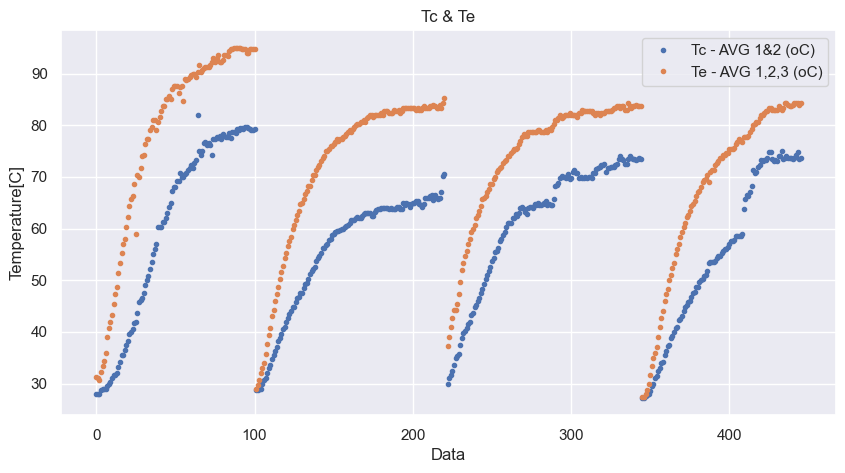

In [136]:
df[['Tc - AVG 1&2 (oC)', 'Te - AVG 1,2,3 (oC)']].plot(style='.',
                                                      figsize=(10,5),
                                                      title = 'Tc & Te',
                                                      xlabel='Data',
                                                      ylabel='Temperature[C]')

<Axes: title={'center': 'Thermal Performance'}, xlabel='Data', ylabel='Thermal Resistance [C/W]'>

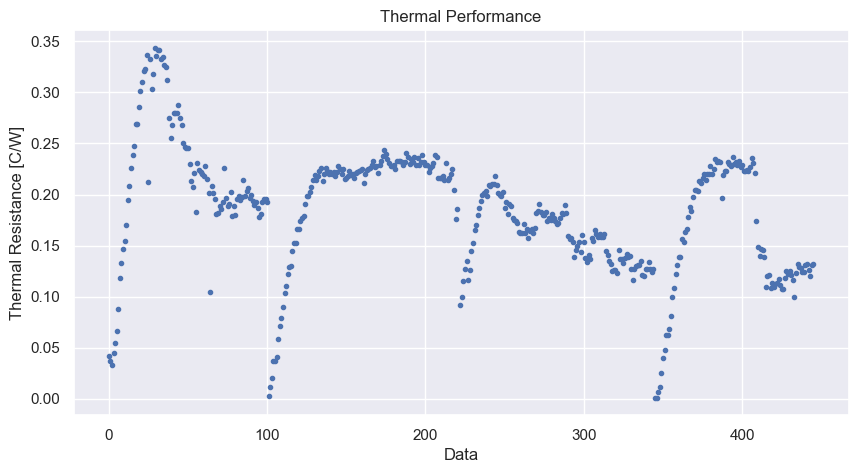

In [137]:
df['Resistance (oC/W)'].plot(style='.',
                             figsize=(10,5),
                             title =  'Thermal Performance',
                             xlabel='Data',
                             ylabel='Thermal Resistance [C/W]')

<Axes: title={'center': 'Pressure'}, xlabel='Data', ylabel='Pressure [mmHg]'>

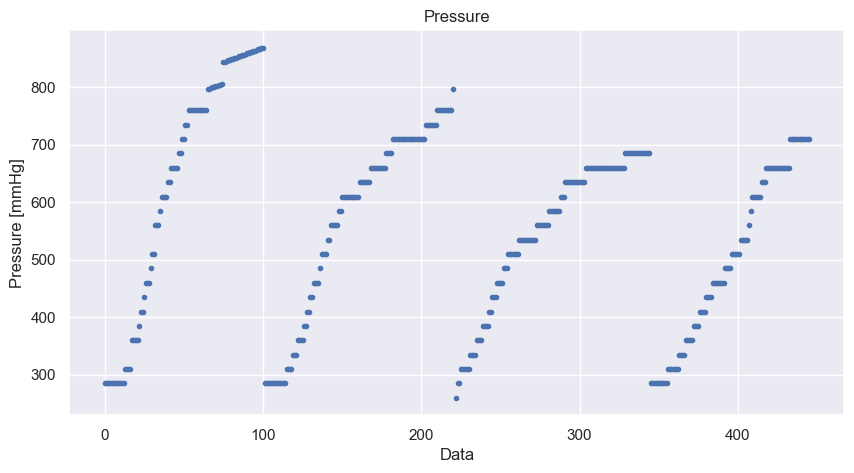

In [138]:
df['Pressure (mm of Hg).1'].plot(style='.',
                                 figsize=(10,5),
                                 title='Pressure',
                                 xlabel='Data',
                                 ylabel='Pressure [mmHg]')

<Axes: title={'center': 'Temperature Difference'}, xlabel='Data', ylabel='Temperature Difference[C]'>

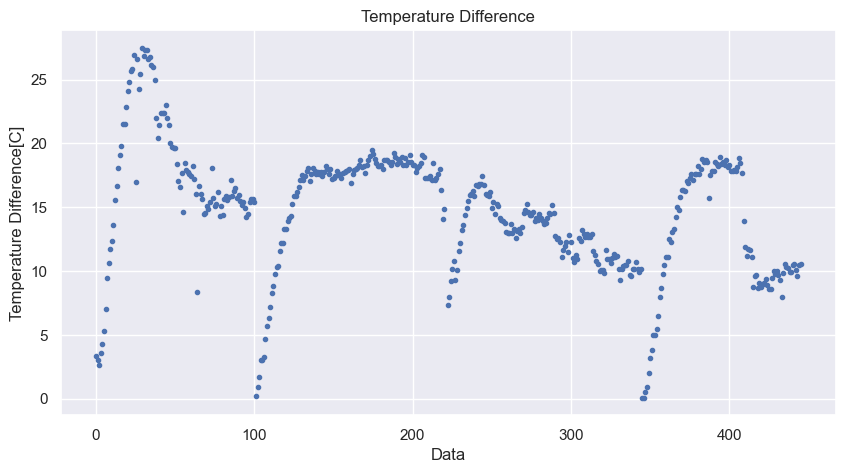

In [139]:
df['Te - Tc (oC)'].plot(style='.',
                        figsize=(10,5),
                        title=('Temperature Difference'),
                        xlabel='Data',
                        ylabel='Temperature Difference[C]')

In [140]:
# data rearranged and filtered
df1 = df.sort_values(by=['Te - AVG 1,2,3 (oC)']).groupby(['Te - AVG 1,2,3 (oC)']).mean()
selected_columns = ['Time (Min)', 'Tc - AVG 1&2 (oC)', 'Te - AVG 1,2,3 (oC)', 'Pressure (mm of Hg).1', 'Te - Tc (oC)', 'Q (W)','Resistance (oC/W)']
df1.index

Float64Index([27.33,  28.0, 28.67,  29.0, 29.67,  30.0, 30.67,  31.0, 31.33,
              31.67,
              ...
              91.67, 92.33, 92.67,  93.0, 93.33, 93.67,  94.0, 94.33, 94.67,
               95.0],
             dtype='float64', name='Te - AVG 1,2,3 (oC)', length=156)

<Axes: xlabel='Te - AVG 1,2,3 (oC)'>

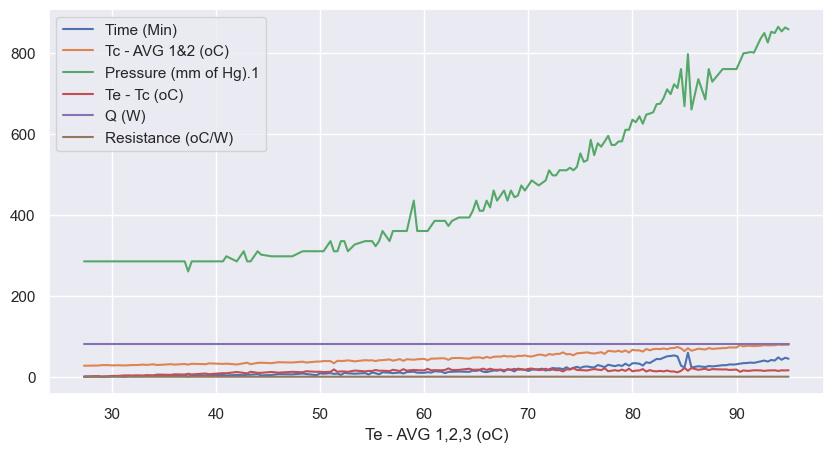

In [141]:
df1.plot(style='-',
        figsize=(10,5))